In [36]:
import matplotlib.pyplot as plt

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
X = iris.data
y = iris.target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=1000)
# softmax_reg.fit(X, y)
cross_val_score(softmax_reg, X, y, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [23]:
softmax_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

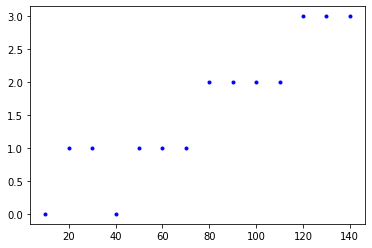

In [42]:
from sklearn.linear_model import LogisticRegression

K = 3
m = len(X)
n = X_train.shape[1]
alpha = 0.01

# idx_shuffle = list(range(m))
# np.random.shuffle(idx_shuffle)

# X = X[idx_shuffle]
# Y = Y[idx_shuffle]
# y = y[idx_shuffle]

for i in range(10,m,10):
    Xtemp = X_train[:i, :]
    # Ytemp = Y[:i, :]
    ytemp = y_train[:i]
#     Theta = np.zeros(shape=(K, n))
      
    softmax_reg.fit(Xtemp[:, 1:], ytemp)
    y_train_predict = softmax_reg.predict(Xtemp[:, 1:])


#     for epoch in range(1000):
    
#         S = np.dot(Xtemp, Theta.T)
#         expS = np.exp(S)
#         P = expS/np.sum(expS, axis=1).reshape(-1, 1)

#         J = -1/m*np.sum(Ytemp*np.log10(P))
#         grad = 1/m*np.dot(Xtemp.T, (P-Ytemp))

#         Theta = Theta - alpha*grad
        
    plt.plot(i, (ytemp.reshape(1, -1) != y_train_predict).sum(), "b.")

In [41]:
(ytemp.reshape(1, -1) != y_train_predict).sum()

0

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])